#### Importing the neccesary modules, reading the data

In [103]:
#importing the necessary modules
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
import kaleido
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
from utils import *

In [105]:
#reading the data file as dataframe
data = pd.read_csv("C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Bridging Imaging Users to Imaging Analysis - 2022 (Responses) - Form Responses 1_copy.csv")

In [106]:
#Creating a dictionary to rename
dict_rename = {
    'Which of the following roles best describes you?':'Role', 
    'Which of the following do you have significant formal training in or experience with? Select all that apply.':'Training', 
    'Where do you currently primarily work?':'Location', 
    'How would you describe your work?':'Work description', 
    'How would you rate your computational skills?':'Level of computational skills', 
    'How would you rate your comfort in developing new computational skills?':'Comfort in developing computational skills', 
    'How do you generally go about solving an image analysis problem? Check the approach(es) you use the most.':'Approach to solutions', 
    'How frequently do you use scripting to solve image analysis problems?':'Frequency of script usage', 
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Scholarly "best practices" article]':'Best practices articles',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Written step-by-step tutorial]':'Written tutorials',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Video tutorial]':'Video tutorial',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Interactive webinar]':'Interactive webinar',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [One-on-one "office hours" with an expert]':'Office hours',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [In person seminar/tutorial lasting <1 day]':'One day seminar',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Multiday workshop]':'Multiday workshop',
    'How interested are you in learning more about the following topics? [Image analysis theory]':'Image analysis theory',
    'How interested are you in learning more about the following topics? [General image analysis practices]':'Image analysis practices',
    'How interested are you in learning more about the following topics? [Image analysis practices related to my (sub) discipline]':'Topics related to sub discipline',
    'How interested are you in learning more about the following topics? [Learning to use a particular software tool]':'Specific software tool',
    'How interested are you in learning more about the following topics? [Deep learning as applied to image analysis]':'Deep learning for image analysis',
    'How interested are you in learning more about the following topics? [Analyzing large images/large numbers of images]':'Analyzing large images',
    'How interested are you in learning more about the following topics? [Visualizing image analysis results]':'Visualization of results',
    'The next question will ask you about particular image analysis tools and techniques. Do you want to answer questions about microscopy in the field/area of life sciences or physical sciences?':'Microscopy for life sciences physical sciences',
    'What image analysis tools have you used before? (check all that apply)':'usage of image analysis tools',
    'What image analysis tools do you use the most?':'Most used image analysis tools',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Brightfield/DIC/phase-contrast of cells or organisms from manually selected fields]':'Brightfield/DIC/phase-contrast manually acquired',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Brightfield/DIC/phase-contrast of cells or organisms from an automated microscope (such as a high content imager)]':'Brightfield/DIC/phase-contrast automated',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Fluorescent images of cells/organisms from manually selected fields]':'Fluorescent images manually acquired',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Fluorescent images of cells/organisms from an automated microscope (such as a high content imager)]':'Fluorescent images automated',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Histologically stained tissue sections]':'Histological tissue sections',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Electron microscopy]':'Electron microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Imaging mass spectrometry]':'Imaging mass spectrometry',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Imaging flow cytometry]':'Imaging flow cytometry',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Superresolution (PALM/STORM)]':'Superresolution (PALM/STORM)',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Autofluorescence imaging (ie FLIM)]':'Autofluorescence imaging (ie FLIM)',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Other]':'Other',
    'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you think are generally well-solved?':'Well solved image analysis problems',
    'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you wish had easier/better solutions?':'Image analysis problems which needs better solutions',
    'What image analysis tools have you used before? (check all that apply)':'Commonly used image analysis tools',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Optical microscopy/DIC/fractography]':'Types of images analyzed-Optical microscopy/DIC/fractography',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Scanning electron microscopy (secondary electron or back scattered imaging)]':'Types of images analyzed-Scanning electron microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Transmission electron microscopy (including electron diffraction and STEM imaging, e.g. HAADF-STEM)]':'Types of images analyzed-Transmission electron microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Spectroscopy/diffractive imaging in the SEM/TEM (eg. EDS, EBSD, EELS, CL)]':'Types of images analyzed-Spectroscopy/diffractive imaging in the SEM/TEM',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Imaging with mass spectrometry (eg SIMS/APT)]':'Types of images analyzed-Imaging with mass spectrometry',
    'What kinds of images do you commonly want to analyze (select all that apply)? [X-ray microscopy (including tomography)]':'Types of images analyzed-X-ray microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [FM imaging, force spectroscopy, single molecule force spectroscopy]':'Types of images analyzed-FM imaging force spectroscopy single molecule force spectroscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Fluorescence microscopy]':'Types of images analyzed-Fluorescence microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Other]':'Types of images analyzed Other',
    'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you think are generally well-solved?':'Well solved image analysis problems-physical sciences',
    'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you wish had easier/better solutions?':'Image analysis problems which needs better solutions physical sciences',
    'Where did you hear about this survey? Please select all that apply.':'hear about this survey',
    'Please select any of the following you have attended in the past':'Previous experience',
    'Are there any image analysis workshops, tutorials, or conferences you are aware of and attended or considered attending? If so, how many?':'Number of conferences/workshops attended',
    'How would you most prefer to be notified about image analysis workshops, sessions, or conferences being planned?':'Notification of image analysis workshop',
    'Are there any image analysis workshops, tutorials, or conferences that you have participated in and found particularly helpful?  If yes, what made them beneficial?':'Experience with previous workshops/conferences',
    'Are there any conferences you\'ve attended in the past that you think would particularly benefit from the addition/expansion of image analysis offerings?':'Recommended conferences/workshops',
    'What specific topics (i.e. overviews of a particular tool, comparisons between pieces of software, or how to use a certain tool for a certain kind of experiment) would you like to see prioritized for future image analysis workshop and tutorial offerings?':'Topics of interest',
    'What do you think analysis tool CREATORS (such as software developers) could/should do to make image analysis better and more successful? How best could we encourage them to do it?':'Creators role',
    'What do you think analysis tool USERS (such as microscopists) could/should do to make image analysis better and more successful?  How best could we encourage them to do it?':'Users role',
    'Any other thoughts?':'Other thoughts',
    'Would you be interested in subscribing to a mailing list (announcing workshops, new tools, collaboration opportunities, etc) for EITHER the Center for Open Bioimage Analysis OR Bioimaging North America OR the Royal Microscopical society? If yes, you will be taken to a page to subscribe, if not this form will submit.':'Subscription'
    }

 'What image analysis tools do you use the most?':'Most used image analysis tools_physical sciences', deleted this because the question was the same for both Life and Physical sciences hence could not the renaming was not proper. 

In [107]:
#renaming the columns of the dictionary
data.rename(columns=dict_rename, inplace=True)

### Roles of the survey participants

In [108]:
# pie chart for the roles of the survey participants 
role_pie_chart = px.pie(data, values=data.Role.value_counts(), names=data.Role.value_counts().index, title="Role", width=700, height=400)
role_pie_chart.update_traces(insidetextorientation = 'radial')
role_pie_chart.update_layout(title_x=0.8,title_y = 0.8, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
role_pie_chart.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\Role.svg')

pip install kaleido==0.1.0post1 - only this version of the kaleido works to save the images 

### Location of the participants

In [109]:
#Geo chart for the location of the participants; locations were given based on a country that is centrally located in a continent
demographics = data["Location"]
demographics_chart = px.scatter_geo(demographics, locations=['UKR', 'USA', 'KGZ', 'BRA', 'AUS','TCD'],size_max=20,opacity=0.2, projection="natural earth", color = data.Location.value_counts().values,text=data.Location.value_counts(), title="Location", labels={'color':'Continent'}, width=600, height=400)
demographics_chart.update_layout(title_x=0.50,title_y=0.80, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
demographics_chart.update_layout(showlegend=False)
demographics_chart.update_coloraxes(showscale=False)
demographics_chart.update_traces(marker=dict(color='blue'))
demographics_chart.update_traces(marker={'size':25})
demographics_chart.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\Location.svg')


### Most used image analysis tools

In [110]:
tools_count(data['Most used image analysis tools'], title='Most used image analysis tools')

<built-in method values of dict object at 0x0000025921FC7CC0>


### Notifications of the future workshops

In [111]:
# how users would like to ne notfied for future workshops
counts_notifications =  data['Notification of image analysis workshop'].dropna(how='all')
counts_notifications = pd.DataFrame(counts_notifications)
counts_notifications['notify'] = counts_notifications['Notification of image analysis workshop'].apply(lambda x:'Other' if x not in ['Word of mouth', 'My local microscopy facility', 'Postings on image.sc forum or microforum', 'A discipline-specific society or network', 'Twitter', 'Email list'] else x)
counts_notifications['notify'].value_counts()

#Graph for notifications 
notify_bar = px.bar(x=counts_notifications['notify'].value_counts().index, y=counts_notifications['notify'].value_counts().values, labels={'y':'Counts', 'x':''}, orientation='v', width=600, height=600, text_auto=True)
notify_bar.update_layout(title= 'Notifications of future workshops',title_x=0.5,title_y = 0.95, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
notify_bar.update_yaxes(categoryorder = 'total ascending', tickangle=45)
notify_bar.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\notifications.svg')


### Frequency of script usage for image analysis 

In [112]:
barchart_vertical(data["Frequency of script usage"],title='Frequency of script usage', order_of_axes=['Often','Most of the time','Sometimes','Never'])

### Number of conferences attended by the participants

In [113]:
barchart_vertical(data["Number of conferences/workshops attended"], title='Conferences attended by the survey participants', order_of_axes=['Many','Some','Few','None'])

### Domains of the participants

In [114]:
# The domains in which the participants work with respect to the roles
data["Training"] = data["Training"].astype(str) # this was done to avoid the NaN rows for further analysis 

In [115]:
# Based on the values in a particular query column('Training'), a new column was created with boolean values based on the presence of the keyterms in the query column;,done using lambda function
data['Cell/Molecular Biology'] = data['Training'].apply(lambda x: True if 'Cell/Molecular Biology' in x else False)
data['Physics/Biophysics'] = data["Training"].apply(lambda x: True if 'Physics/Biophysics'in x else False)
data['Chemistry/Biochemistry'] = data["Training"].apply(lambda x: True if 'Chemistry/Biochemistry'in x else False)
data['Statistics/Biostatistics'] =data['Training'].apply(lambda x: True if 'Statistics/Biostatistics' in x else False)
data['Medicine'] = data['Training'].apply(lambda x: True if 'Medicine' in x else False)
data['Computer science'] = data['Training'].apply(lambda x: True if 'Computer science' in x else False)
data['Computer vision'] = data['Training'].apply(lambda x: True if 'Computer vision' in x else False)
data['Deep learning'] = data['Training'].apply(lambda x: True if 'Deep learning' in x else False)
data['Developmental Biology'] = data['Training'].apply(lambda x: True if 'Developmental Biology' in x else False)

In [116]:
#slicing the columns of interest and performing counts to get the respective counts
df_Cell_Molecular_Biology = data.loc[:, ["Role","Cell/Molecular Biology"]]
Cell_Molecular_Biology = df_Cell_Molecular_Biology.groupby("Role").sum().reset_index()

df_Physics_Biophysics = data.loc[:, ["Role", "Physics/Biophysics"]]
Physics_Biophysics = df_Physics_Biophysics.groupby("Role").sum().reset_index()

df_Chemistry_Biochemistry =data.loc[:, ["Role", "Chemistry/Biochemistry"]]
Chemistry_Biochemistry = df_Chemistry_Biochemistry.groupby("Role").sum().reset_index()

df_Statistics_Biostatistics = data.loc[:, ["Role","Statistics/Biostatistics"]]
Statistics_Biostatistics = df_Statistics_Biostatistics.groupby("Role").sum().reset_index()

df_Medicine = data.loc[:, ["Role", "Medicine"]]
Medicine = df_Medicine.groupby("Role").sum().reset_index()

df_Computer_science = data.loc[:,["Role", "Computer science"]]
Computer_science = df_Computer_science.groupby("Role").sum().reset_index()

df_Computer_vision = data.loc[:, ["Role", "Computer vision"]]
Computer_vision = df_Computer_vision.groupby("Role").sum().reset_index()

df_Deep_learning = data.loc[:, ["Role", "Deep learning"]]
Deep_learning = df_Deep_learning.groupby("Role").sum().reset_index()

df_Developmental_Biology = data.loc[:, ["Role", "Developmental Biology"]]
Developmental_Biology = df_Developmental_Biology.groupby("Role").sum().reset_index()


In [117]:
#concatenating the dataframes with respect to roles and domains
df_role_domain = pd.concat([Cell_Molecular_Biology, Physics_Biophysics, Chemistry_Biochemistry, Statistics_Biostatistics, Medicine, Computer_science, Computer_vision, Deep_learning, Developmental_Biology], axis=1)

#since the roles column was repetitive, the duplicate 'role' columns were removed
df_role_domain = df_role_domain.T.drop_duplicates().T

role=df_role_domain["Role"]


In [118]:
# Stacked bar chart - role with domains on what the participants are working
x=role

fig = go.Figure(go.Bar(name='Developmental Biology', y=role, x=df_role_domain["Developmental Biology"], orientation='h', insidetextanchor='end', text=df_role_domain["Developmental Biology"]))
fig.add_trace(go.Bar(name='Deep learning', y=role, x=df_role_domain["Deep learning"], orientation='h', text=df_role_domain["Deep learning"]))
fig.add_trace(go.Bar(name='Computer vision', y=role, x=df_role_domain["Computer vision"],  orientation='h', text = df_role_domain["Computer vision"]))
fig.add_trace(go.Bar(name="Computer science", y=role, x=df_role_domain["Computer science"],  orientation='h', text=df_role_domain["Computer science"]))
fig.add_trace(go.Bar(name="Medicine", y=role, x=df_role_domain["Medicine"],  orientation='h', text =df_role_domain["Medicine"]))
fig.add_trace(go.Bar(name="Statistics/Biostatistics", y=role, x=df_role_domain["Statistics/Biostatistics"],  orientation='h', text =df_role_domain["Statistics/Biostatistics"]))
fig.add_trace(go.Bar(name="Chemistry/Biochemistry", y=role, x=df_role_domain["Chemistry/Biochemistry"],  orientation='h', text=df_role_domain["Chemistry/Biochemistry"]))
fig.add_trace(go.Bar(name="Physics/Biophysics", y=role, x=df_role_domain["Physics/Biophysics"],  orientation='h', text=df_role_domain["Physics/Biophysics"]))
fig.add_trace(go.Bar(name="Cell/Molecular Biology", y=role, x=df_role_domain["Cell/Molecular Biology"],  orientation='h', text=df_role_domain["Cell/Molecular Biology"]))

fig.update_layout(barmode='stack', title='Role Based Training & Experience', title_x=0.5, title_y=0.9, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
fig.update_layout(width=1200,legend=dict(yanchor="bottom",y=0.02,xanchor="right",x=0.99))
fig.update_yaxes(categoryorder = 'total ascending')
fig.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\role_domains.svg')

### Work type and skills of the participants

In [119]:
#Work description - creating new columns based on the values provided by the participants in the work description
data["Imaging"] = data.eval("`Work description` < 3")
data["Balanced"] = data.eval("`Work description` in [3,4,5]")
data["Analyst"] = data.eval("`Work description` > 5")
Work_type = [sum(data["Imaging"]), sum(data["Balanced"]), sum(data["Analyst"])]
Work_type

# creating a column for work type
data.loc[data["Work description"] < 3, "Work type" ] = "Imaging"
data.loc[(data["Work description"] >= 3) & (data["Work description"] <= 5), "Work type"] = "Balanced"
data.loc[data["Work description"] > 5, "Work type"] = "Analyst"
work_type_counts = data["Work type"].value_counts()
work_type_counts 

# creating a column for knowledge in computational skills 
data.loc[data["Level of computational skills"] < 3, "Knowledge of computational skills"] = "Low skill"
data.loc[(data["Level of computational skills"] >= 3) & (data["Level of computational skills"] <= 5), "Knowledge of computational skills"] = "Medium skill"
data.loc[data["Level of computational skills"] > 5, "Knowledge of computational skills"] = "High skill"
computational_knowledge = data["Knowledge of computational skills"].value_counts()


In [120]:
#Dataframe for work description - distribution 
work_cat = data['Work description'].value_counts().to_frame().reset_index()
work_cat['Percentage'] = (work_cat['Work description']/work_cat['Work description'].sum())*100
work_cat['Percentage'] = work_cat['Percentage'].round(decimals=1)
work_cat.loc[work_cat['index'] <3, 'Category'] ='Imaging'
work_cat.loc[(work_cat['index'] >= 3) & (work_cat['index'] <= 5), 'Category'] ='Balanced'
work_cat.loc[work_cat['index'] >5 , 'Category'] ='Analyst'
work_cat = work_cat.sort_values(by='index')


In [121]:
#graph for work description -distribution 
work_cat_bar = px.bar(work_cat, x=work_cat['index'], y=work_cat['Work description'], labels={'index':'', 'Work description':'Counts'},text=work_cat['Percentage'],text_auto=True, color='Category', color_discrete_map = {'Imaging':'lightskyblue', 'Balanced':'darkseagreen', 'Analyst':'orchid'})
work_cat_bar.update_layout(width=700, height=500, legend_traceorder = 'normal' )
work_cat_bar.update_layout(title='Work description', title_x=0.5, title_y=0.95, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
work_cat_bar.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\work_des_distbn.svg')


In [122]:
#dataframe for categorization of computational skills 
comp_skill_distbn = data["Level of computational skills"].value_counts().to_frame().reset_index()
comp_skill_distbn['Percentage'] = (comp_skill_distbn['Level of computational skills']/comp_skill_distbn['Level of computational skills'].sum())*100
comp_skill_distbn['Percentage'] = comp_skill_distbn['Percentage'].round(decimals=1)
comp_skill_distbn.loc[comp_skill_distbn['index'] <3, 'Category'] = 'Low skill'
comp_skill_distbn.loc[(comp_skill_distbn['index'] >= 3) & (comp_skill_distbn['index'] <= 5), 'Category'] = 'Medium skill'
comp_skill_distbn.loc[comp_skill_distbn['index'] >5, 'Category'] = 'High skill'
comp_skill_distbn = comp_skill_distbn.sort_values(by='index')


In [123]:
#graph for computational skill- distribution 
comp_skill_distbn_bar = px.bar(comp_skill_distbn, x=comp_skill_distbn['index'], y=comp_skill_distbn['Level of computational skills'], labels={'index':'', 'Level of computational skills':'Counts'},text=comp_skill_distbn['Percentage'],text_auto=True, color='Category',
color_discrete_map = {'Low skill':'lightskyblue', 'Medium skill':'darkseagreen', 'High skill':'orchid'})
comp_skill_distbn_bar.update_layout(width=750, height=500)
comp_skill_distbn_bar.update_layout(title='Level of computational skills', title_x=0.5, title_y=0.95, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
comp_skill_distbn_bar.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\comp_skill_distbn.svg')



In [124]:
# Comfort in developing new computational skills
data.loc[data["Comfort in developing computational skills"] < 3, 'Comfort'] = 'Low comfort'
data.loc[(data['Comfort in developing computational skills'] >= 3) & (data['Comfort in developing computational skills'] <= 5), 'Comfort'] = "Medium comfort"
data.loc[data['Comfort in developing computational skills'] > 5 , 'Comfort'] = "High comfort"

In [125]:
#dataframe for categorization of comfort in developing new computational skills
comf_distbn = data['Comfort in developing computational skills'].value_counts().to_frame().reset_index()
comf_distbn['Percentage'] = (comf_distbn['Comfort in developing computational skills']/comf_distbn['Comfort in developing computational skills'].sum())*100
comf_distbn['Percentage'] = comf_distbn['Percentage'].round(decimals=1)
comf_distbn.loc[comf_distbn['index'] <3, 'Category'] ='Low comfort'
comf_distbn.loc[(comf_distbn['index'] >= 3) & (comf_distbn['index'] <= 5), 'Category'] ='Medium comfort'
comf_distbn.loc[comf_distbn['index'] >5 , 'Category'] ='High  comfort'
comf_distbn = comf_distbn.sort_values(by='index')

In [126]:
#graph for the comfort in developing new computational skills - distribution 
comf_distbn_bar = px.bar(comf_distbn, x=comf_distbn['index'], y=comf_distbn['Comfort in developing computational skills'], labels={'index':'', 'Comfort in developing computational skills':'Counts'},text=comf_distbn['Percentage'],text_auto=True, color='Category', 
color_discrete_map = {'Low comfort':'lightskyblue', 'Medium comfort':'darkseagreen', 'High  comfort':'orchid'})
comf_distbn_bar.update_layout(width=750, height=500)
comf_distbn_bar.update_layout(title='Comfort in developing new computational skills', title_x=0.5, title_y=0.95, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
comf_distbn_bar.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\comf_distbn.svg')



In [127]:
#combining the work type, comp skills and comfort 
work_comp_com_df = data.loc[:, ['Work type', 'Knowledge of computational skills', 'Comfort', 'Microscopy for life sciences physical sciences']]
work_comp_com_lif_df = work_comp_com_df.groupby('Microscopy for life sciences physical sciences').get_group('Life Sciences')
work_comp_com_phy_df = work_comp_com_df.groupby('Microscopy for life sciences physical sciences').get_group('Physical Sciences')

#grouping life science participants
work_comp_com_lif_df_grp = work_comp_com_lif_df.groupby('Comfort').value_counts().reset_index()
work_comp_com_lif_df_grp = work_comp_com_lif_df_grp.rename(columns={0:'counts'})

#grouping physical science participants 
work_comp_com_phy_df_grp = work_comp_com_phy_df.groupby('Comfort').value_counts().reset_index()
work_comp_com_phy_df_grp = work_comp_com_phy_df_grp.rename(columns={0:'counts'})

#Combined - both life and physical 
work_comp_com_df_grp = work_comp_com_df.groupby('Comfort').value_counts().reset_index()
work_comp_com_df_grp = work_comp_com_df_grp.rename(columns={0:'counts'})


In [128]:
#sunburst for life science participants 
sun_lif = px.sunburst(work_comp_com_lif_df_grp, path=["Work type", 'Knowledge of computational skills', 'Comfort'],color = 'Work type', color_discrete_map = {'Imaging':'lightskyblue', 'Balanced':'darkseagreen', 'Analyst':'orchid'}, values='counts', width=500, height=500)
sun_lif.update_traces(textinfo="label+percent parent", insidetextorientation = 'radial')
sun_lif.update_layout(title="Skills of the participants (Life Sciences)", title_x=0.5, font=dict(family='Helvetica', color="Black", size=16))
sun_lif.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\skill_lif.svg')


In [129]:
#sunburst for physical science participants 
sun_phy = px.sunburst(work_comp_com_phy_df_grp, path=["Work type", 'Knowledge of computational skills', 'Comfort'],color='Work type', color_discrete_map = {'Imaging':'lightskyblue', 'Balanced':'darkseagreen', 'Analyst':'orchid'}, values='counts', width=500, height=500)
sun_phy.update_traces(textinfo="label+percent parent", insidetextorientation = 'radial')
sun_phy.update_layout(title="Skills of the participants (Physical Sciences)", title_x=0.5, font=dict(family='Helvetica', color="Black", size=16))
sun_phy.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\skill_phy.svg')


In [130]:
work_comp_com_df_grp = work_comp_com_df_grp.sort_values(['Work type', 'Comfort', 'Knowledge of computational skills']).reset_index()


In [206]:
#sunburst for combined group 
lif_phy = px.sunburst(work_comp_com_df_grp, path=["Work type", 'Knowledge of computational skills', 'Comfort'], color = 'Work type', color_discrete_map = {'Imaging':'lightskyblue', 'Balanced':'darkseagreen', 'Analyst':'orchid'}, values='counts', width=500, height=500)
lif_phy.update_traces(textinfo="label+percent parent", insidetextorientation = 'radial', sort=False, selector=dict(type='sunburst'))
lif_phy.update_layout(title="Skills of the participants", title_x=0.5, font=dict(family='Helvetica', color="Black", size=16))
lif_phy.update_traces(leaf=dict(opacity = 1))
lif_phy.update_traces(sort=False, selector=dict(type='sunburst')) 
lif_phy.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\skill_comf_work.svg')
lif_phy


### Ways people analyze data

In [132]:
barchart_horizontal(data["Approach to solutions"], title='Approach to solutions')

### Preferable instructional methods 

In [133]:
cols_mtds = data.iloc[:,10:17] 

In [134]:
percentage_stackedcharts(cols_mtds, title='How preferable do you find each of these instructional methods',order_of_stacks=['Verypreferable', 'Moderatelypreferable', 'Somewhatpreferable', 'Notatallpreferable'], 
order_of_axes=['Written tutorials', 'Video tutorial', 'Office hours', 'One day seminar', 'Interactive webinar','Best practices articles', 'Multiday workshop'], colors={'Verypreferable':'royalblue','Moderatelypreferable':'dodgerblue','Somewhatpreferable':'cornflowerblue','Notatallpreferable':'skyblue'})

### Topics of interest for the tutorials 

In [135]:
pre_top = data.iloc[:,17:24] 

In [136]:
percentage_stackedcharts(pre_top, title='How interested are you in learning more about the following topics',order_of_stacks=['Veryinterested', 'Moderatelyinterested', 'Somewhatinterested', 'Notatallinterested'], 
order_of_axes=['Topics related to sub discipline', 'Visualization of results', 'Analyzing large images', 'Image analysis practices', 'Specific software tool', 'Deep learning for image analysis', 'Image analysis theory'], colors={'Veryinterested':'royalblue','Moderatelyinterested':'dodgerblue','Somewhatinterested':'cornflowerblue','Notatallinterested':'skyblue'})

### Image analysis tools

In [137]:
tools_count(data['Commonly used image analysis tools'], title='Commonly used image analysis tools')

<built-in method values of dict object at 0x0000025922135D40>


#### How did you hear about this survey?

In [138]:
# hear about this survey
#creating a list of the dataframe column values 
test = data['hear about this survey'].dropna().tolist() 
test_split = [i.split(',') for i in test]   #splitting the list based on comma 
test_flat = [i for innerlist in test_split for i in innerlist]  #converting a nested list to a flat list 
test_wo_spaces = [i.lstrip() for i in test_flat] #removing the leading spaces in the string 
test_count = dict((x,test_wo_spaces.count(x)) for x in set(test_wo_spaces)) # creating a dictionary with counts of each unique values 

#creating dataframes 
list_to_include = ['The Images2Knowledge(I2K) conference', 'A discipline-specific society or network','Email list','Postings on image.sc forum or microforum', 'Twitter', 'My local microscopy facility', 'Word of mouth']
filtered_dict = {k:v for k,v in test_count.items() if k in list_to_include} 
filtered_dict_other = {k:v for k,v in test_count.items() if k not in list_to_include}  # filtering out the 'Other'category
df_hear = pd.DataFrame.from_dict(filtered_dict, orient='index')
other_df = pd.DataFrame.from_dict(filtered_dict_other, orient ='index')
df_hear = df_hear.reset_index()
df_hear = df_hear.rename(columns={0:'counts'})

#Other category is added  as a separate row along with the sum 
other = {'index':'Other', 'counts':other_df[0].sum()}
df_hear = df_hear.append(other, ignore_index=True)


C:\Users\ssivagur\AppData\Local\Temp\ipykernel_66512\3689268892.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [139]:
# chart for the source pf survey
source_bar = px.bar(df_hear, y=df_hear['index'], x=df_hear['counts'],labels={'index':''}, text_auto=True, width=700, height=500)
source_bar.update_layout(title ='Where did you hear about this survey?', title_x=0.5, height =500, title_y=0.95, font=dict(family='Helvetica', color="Black", size=16))
source_bar.update_yaxes(categoryorder ='total ascending')

### Previous experience with image analysis 

In [140]:
barchart_horizontal(data['Previous experience'], title='Previous experience')

#### Kinds of images analyzed

In [203]:
kinds_of_images = data.iloc[:, 27:38]

In [205]:
stacked_barchart(kinds_of_images,title="What kinds of images do you commonly want to analyze", order_of_stacks=['2D', '2D+time','3D(<3000x3000x100)', '3D+time', '3Dlargevolume+time', '3D(SPIM/largevolume)'] )

### Wordcloud 


### Well solved image analysis problems

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:224: FutureWarning:

The default value of regex will change from True to False in a future version.



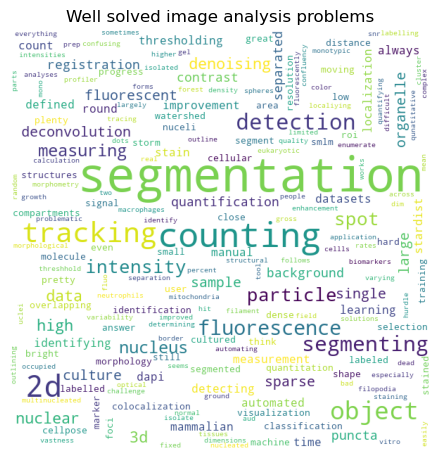

In [141]:
#generating word clouds
wordcloud(data["Well solved image analysis problems"], extra_stopwords=['finding nuclei','finding', 'nuclei', 'tissue','analysis', 'analysis of super-resolution data', 'cell', 'cells', 'etc', 'image', 'images', 'well', 
             'solved', 'imaging', 'better', 'simple', 'different', 'non', 'within', 'depend', 'none', 'things', 'easy', 'many', 'almost', 'common', 
             'though', 'n', 'depends', 'number', 'made', 'seem', 'show','little','clearly','need','often', 'particularly','em','way', 'co', 'size', 'types','using', 'set', 'every', 'possible', 'based', 'generally', 'semi', 'work', 'don', 't', 'basic', 's', 'e', 'g', 'esp', 'right'])

### Image analysis problems which needs better solutions

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:224: FutureWarning:

The default value of regex will change from True to False in a future version.



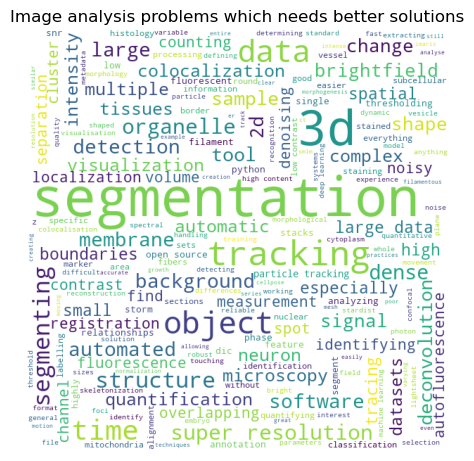

In [142]:
wordcloud(data["Image analysis problems which needs better solutions"], extra_stopwords=['finding nuclei','finding', 'nuclei', 'tissue','analysis', 'analysis of super-resolution data', 'cell', 'cells', 'etc', 'image', 'images', 'well', 
             'solved', 'imaging', 'better', 'simple', 'different', 'non', 'within', 'depend', 'none', 'things', 'easy', 'many', 'almost', 'common', 
             'though', 'n', 'depends', 'number', 'made', 'seem', 'show','little','clearly','need','often', 'particularly','em','way', 'co', 'size', 'types','using', 'set', 'every', 'possible', 'based', 'generally', 'semi', 'work', 'don', 't', 'basic', 's', 'e', 'g', 'esp', 'right'])

### Creators role 

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:224: FutureWarning:

The default value of regex will change from True to False in a future version.



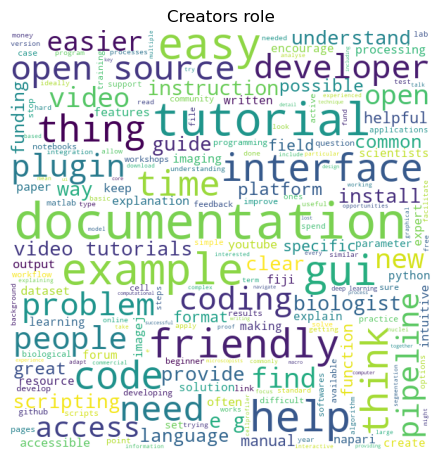

In [143]:
wordcloud(data["Creators role"], extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'image', 'don', 't', 's', 'etc', 
                 'used', 'clearly', 'doesn', 'best', 'touch', 'give', 'non', 'less', 'images', 'asap', 'high','using', 'well', 'work', 'even', 'end',
                 'others','everyone','everything','know','really','without','something','always','one','want', 'exactly', 've','m','certain', 're','instead',
                 'us','maybe','sc', 'kind','going', 'different','see','especially', 'lack','much', 'past', 'selves', 'running', 'either','require', 'happens', 'lot', 'put', 'perhaps', 
                 'properly', 'many', 'behave', 'good', 'data', 'away', 'tell', 'will'])

In [144]:
#Creating a dataframe for creators role from imaging participants
creator_role_based = data.loc[:, ['Creators role', 'Work type']]
creator_role_based = creator_role_based.dropna()
creator_role_based= creator_role_based.groupby('Work type')
creator_imaging = creator_role_based.get_group('Imaging')
creator_imaging = creator_imaging.rename(columns={'Creators role':'Creators role-Imaging participants'})


c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:224: FutureWarning:

The default value of regex will change from True to False in a future version.



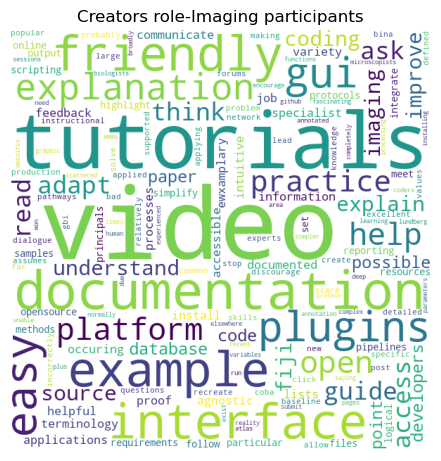

In [145]:
wordcloud(creator_imaging["Creators role-Imaging participants"], extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'image', 'don', 't', 's', 'etc', 
                 'used', 'clearly', 'doesn', 'best', 'touch', 'give', 'non', 'less', 'images', 'asap', 'high','using', 'well', 'work', 'even', 'end',
                 'others','everyone','everything','know','really','without','something','always','one','want', 'exactly', 've','m','certain', 're','instead',
                 'us','maybe','sc', 'kind','going', 'different','see','especially', 'lack','much', 'past', 'selves', 'running', 'either','require', 'happens', 'lot', 'put', 'perhaps', 
                 'properly', 'many', 'behave', 'good', 'data', 'away', 'tell', 'will'])

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:224: FutureWarning:

The default value of regex will change from True to False in a future version.



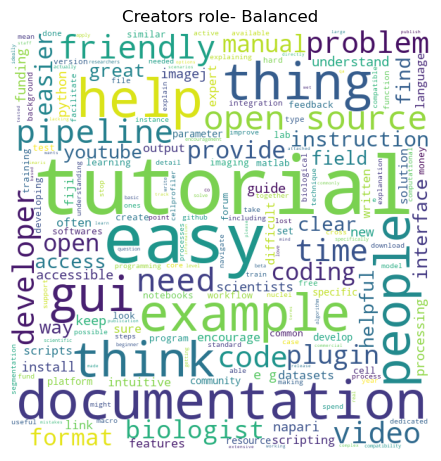

In [146]:
#Creating a dataframe for creators role from balanced participants
creator_balanced = creator_role_based.get_group('Balanced')
creator_balanced = creator_balanced.rename(columns={'Creators role':'Creators role- Balanced'})

wordcloud(creator_balanced['Creators role- Balanced'], extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'image', 'don', 't', 's', 'etc', 
                 'used', 'clearly', 'doesn', 'best', 'touch', 'give', 'non', 'less', 'images', 'asap', 'high','using', 'well', 'work', 'even', 'end',
                 'others','everyone','everything','know','really','without','something','always','one','want', 'exactly', 've','m','certain', 're','instead',
                 'us','maybe','sc', 'kind','going', 'different','see','especially', 'lack','much', 'past', 'selves', 'running', 'either','require', 'happens', 'lot', 'put', 'perhaps', 
                 'properly', 'many', 'behave', 'good', 'data', 'away', 'tell', 'will'])

In [147]:
#Creating a dataframe for creators role from analyst 
creator_analyst = creator_role_based.get_group('Analyst')
creator_analyst = creator_analyst.rename(columns={'Creators role':'Creators role-Analyst'})

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:224: FutureWarning:

The default value of regex will change from True to False in a future version.



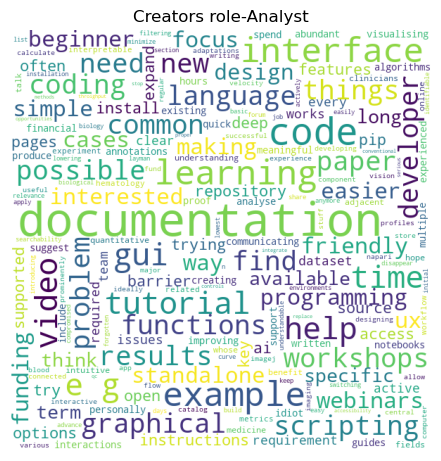

In [148]:
wordcloud(creator_analyst['Creators role-Analyst'], extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'image', 'don', 't', 's', 'etc', 
                 'used', 'clearly', 'doesn', 'best', 'touch', 'give', 'non', 'less', 'images', 'asap', 'high','using', 'well', 'work', 'even', 'end',
                 'others','everyone','everything','know','really','without','something','always','one','want', 'exactly', 've','m','certain', 're','instead',
                 'us','maybe','sc', 'kind','going', 'different','see','especially', 'lack','much', 'past', 'selves', 'running', 'either','require', 'happens', 'lot', 'put', 'perhaps', 
                 'properly', 'many', 'behave', 'good', 'data', 'away', 'tell', 'will', 'd'])

### Users role 

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:224: FutureWarning:

The default value of regex will change from True to False in a future version.



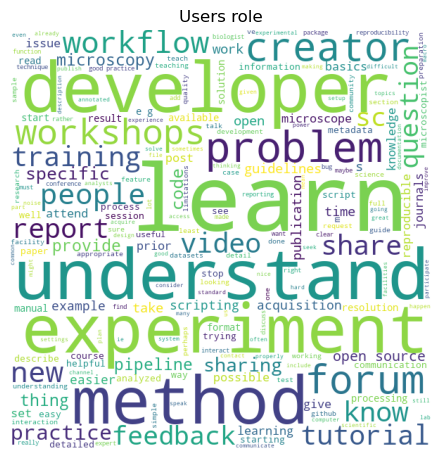

In [149]:
wordcloud(data["Users role"], extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'don', 'image', 'imaging', 'images', 
                  'data', 'think', 'best', 'need', 'encourage', 'etc', 't', 'needs', 'basic', 'able', 'keep', 'used', 'help', 'high', 'try', 'first', 'clearly',
                  'bit', 'will', 'different', 'field', 'non', 'ask'])

In [150]:
# Grouping based on work type and users role 
user_role_based = data.loc[:, ['Users role', 'Work type']]
user_role_based = user_role_based.dropna()
user_role_based= user_role_based.groupby('Work type')

user_role_imaging = user_role_based.get_group('Imaging')
user_role_imaging =user_role_imaging.rename(columns={'Users role':'Users role - Imaging'})


c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:224: FutureWarning:

The default value of regex will change from True to False in a future version.



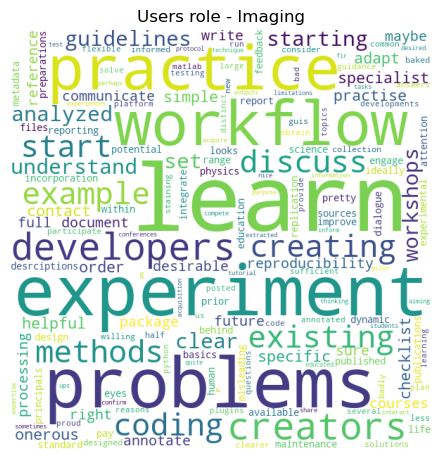

In [151]:
# wordcloud for users role - imaging participants 
wordcloud(user_role_imaging["Users role - Imaging"], extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'don', 'image', 'imaging', 'images', 
                  'data', 'think', 'best', 'need', 'encourage', 'etc', 't', 'needs', 'basic', 'able', 'keep', 'used', 'help', 'high', 'try', 'first', 'clearly',
                  'bit', 'will', 'different', 'field', 'non', 'ask']) 

In [152]:
#creating dataframe for the 'Users role-Balanced'
user_role_balanced = user_role_based.get_group('Balanced')
user_role_balanced = user_role_balanced.rename(columns ={'Users role':'Users role-Balanced'})

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:224: FutureWarning:

The default value of regex will change from True to False in a future version.



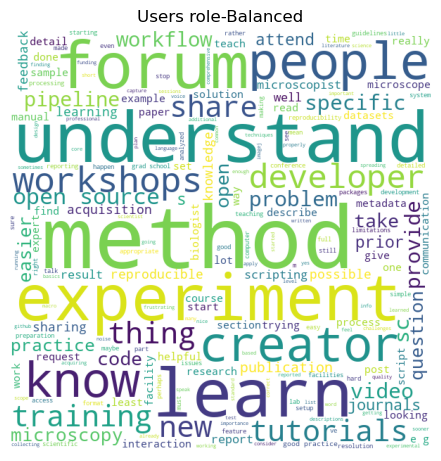

In [153]:
# wordcloud for users role - balanced participants 
wordcloud(user_role_balanced["Users role-Balanced"], extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'don', 'image', 'imaging', 'images', 
                  'data', 'think', 'best', 'need', 'encourage', 'etc', 't', 'needs', 'basic', 'able', 'keep', 'used', 'help', 'high', 'try', 'first', 'clearly',
                  'bit', 'will', 'different', 'field', 'non', 'ask'])

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:224: FutureWarning:

The default value of regex will change from True to False in a future version.



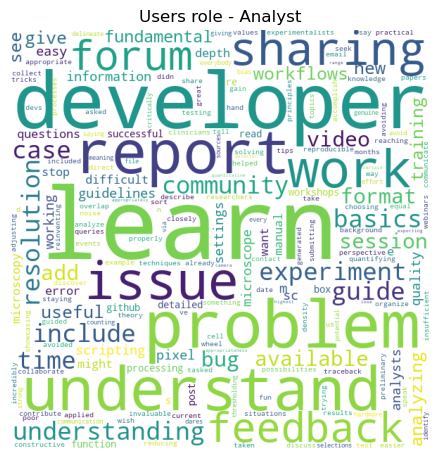

In [154]:
#Users role - Analyst
user_role_analyst = user_role_based.get_group('Analyst')
user_role_analyst = user_role_analyst.rename(columns={'Users role':'Users role - Analyst'})

# wordcloud for users role - analyst  
wordcloud(user_role_analyst["Users role - Analyst"], extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'don', 'image', 'imaging', 'images', 
                  'data', 'think', 'best', 'need', 'encourage', 'etc', 't', 'needs', 'basic', 'able', 'keep', 'used', 'help', 'high', 'try', 'first', 'clearly',
                  'bit', 'will', 'different', 'field', 'non', 'ask'])

### Conferences/workshops attended 

In [155]:
#Are there any image analysis workshops, tutorials, or conferences that you have participated in and found particularly helpful? If yes, what made them beneficial?
workshops = data["Experience with previous workshops/conferences"].str.lower().str.strip()
workshops = workshops.dropna(how='all').to_frame()

#creating new columns based on the values in the query column
workshops["NEUBIAS"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'neubias' in x else False)
workshops["Fiji/ImageJ"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if ('imagej' in x) or ('fiji' in x) else False)
workshops["Cellprofiler"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'cellprofiler' in x else False)
workshops["Imaris"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'imaris' in x else False)
workshops["Robert Haase"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'robert' in x else False)
workshops["AQLM"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'aqlm' in x else False)
workshops["CSHL"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'cshl' in x else False)
workshops["I2K"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'i2k' in x else False)
workshops["EMBL"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'embl' in x else False)

#Chart
workshops_for_chart = workshops.drop(columns=['Experience with previous workshops/conferences', 'CSHL'])
workshops_for_chart = workshops_for_chart.sum().to_frame()
workshops_chart = px.bar(workshops_for_chart, labels={'value':'counts', 'index':''}, text_auto=True)
workshops_chart.update_layout(title_x=0.5, title='Workshops attended by the participants', width=500, height=500, showlegend=False, font=dict(family='Helvetica', color="Black", size=16))
workshops_chart.update_xaxes(categoryorder = 'total descending')
workshops_chart.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\workshops.svg')


#### Are there any conferences you've attended in the past that you think would particularly benefit from the addition/expansion of image analysis offerings?

In [156]:
#CSVs for unigrams
ngrams(data["Recommended conferences/workshops"], range=(1,1), name='topics_of_interest_unigrams')

#CSVs for bigrams
ngrams(data["Recommended conferences/workshops"], range=(2,2), name='topics_of_interest_bigrams')

#CSVs for trigrams
ngrams(data["Recommended conferences/workshops"], range=(3,3), name='topics_of_interest_trigrams')


In [235]:
word_counts(data['Recommended conferences/workshops'],synonym_dict={'ASCB':['ascb'], 
'MMC':['mmc'], 
'ELMI':['elmi'], 
'ABRF':['abrf'], 
'NEUBIAS':['neubias'], 
'FOM':['fom'], 
'Biophysical society':['biophysical society'],
'Developmental Biology':['developmental biology']}, title='Conferences that would benefit image analysis offerings')

### Topics of interest for the future image analysis tutorials 

In [159]:
#CSVs for unigrams
ngrams(data["Topics of interest"], range=(1,1), name='Conferences_benefit_imageanalysis_unigrams')

#CSVs for bigrams
ngrams(data["Topics of interest"], range=(2,2), name='Conferences_benefit_imageanalysis_bigrams')

#CSVs for trigrams
ngrams(data["Topics of interest"], range=(3,3), name='Conferences_benefit_imageanalysis_trigrams')

In [221]:
word_counts(data['Topics of interest'], synonym_dict ={'Python':['python', 'script','scripts', 'scripting', 'coding', 'scriptimg'], 
'Deep/machine learning':['deep learning','machine learning','deep', 'deeplearning'], 
'FIJI':['fiji', 'imagej', 'macro', 'macros', 'imagej2'], 
'Open source':['open source'], 
'Certain tools':['certain tools', 'certain tool'], 
'Cellprofiler':['cellprofiler'], 
'Best practices':['best practices'], 
'Comparisons':['comparisons', 'comparison'], 
'Segmentation':['segmentation', 'cell segmentation'], 
'Napari':['napari'], 
}, title='Topics of interest for image analysis tutorials')

## 2022 - comparisons with comp skills and comfort in developing new comp skills 

In [182]:
#Comparing the skills with interest for the topics of image analysis tutorials 
int_skills_df_1 = data.iloc[:,17:24]
int_skills_df_2 = data.iloc[:,77]
int_skills_df = pd.concat([int_skills_df_1, int_skills_df_2], axis=1)


In [165]:
##categories -theory 
df_theory = int_skills_df.loc[:, ["Image analysis theory", "Knowledge of computational skills"]]

df_the_grp = df_theory.groupby('Knowledge of computational skills')
#High skilled- theory
df_the_high = df_the_grp.get_group('High skill')
df_the_high = df_the_high['Image analysis theory'].value_counts().to_frame().reset_index()
df_the_high['per_high'] =(df_the_high['Image analysis theory']/df_the_high['Image analysis theory'].sum())*100
df_the_high['per_high'] = df_the_high['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med = df_the_grp.get_group('Medium skill')
df_the_med = df_the_med['Image analysis theory'].value_counts().to_frame().reset_index()
df_the_med['per_med'] =(df_the_med['Image analysis theory']/df_the_med['Image analysis theory'].sum())*100
df_the_med['per_med'] = df_the_med['per_med'].round(decimals=1)

#low skill -theory 
df_the_low = df_the_grp.get_group('Low skill')
df_the_low = df_the_low['Image analysis theory'].value_counts().to_frame().reset_index()
df_the_low['per_low'] =(df_the_low['Image analysis theory']/df_the_low['Image analysis theory'].sum())*100
df_the_low['per_low'] = df_the_low['per_low'].round(decimals=1)


In [167]:
##categories - practices
df_practices = int_skills_df.loc[:, ["Image analysis practices", "Knowledge of computational skills"]]

df_the_grp_1 = df_practices.groupby('Knowledge of computational skills')
#High skilled- practices
df_the_high_p = df_the_grp_1.get_group('High skill')
df_the_high_p = df_the_high_p['Image analysis practices'].value_counts().to_frame().reset_index()
df_the_high_p['per_high'] =(df_the_high_p['Image analysis practices']/df_the_high_p['Image analysis practices'].sum())*100
df_the_high_p['per_high'] = df_the_high_p['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_p = df_the_grp_1.get_group('Medium skill')
df_the_med_p = df_the_med_p['Image analysis practices'].value_counts().to_frame().reset_index()
df_the_med_p['per_med'] =(df_the_med_p['Image analysis practices']/df_the_med_p['Image analysis practices'].sum())*100
df_the_med_p['per_med'] = df_the_med_p['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_p = df_the_grp_1.get_group('Low skill')
df_the_low_p = df_the_low_p['Image analysis practices'].value_counts().to_frame().reset_index()
df_the_low_p['per_low'] =(df_the_low_p['Image analysis practices']/df_the_low_p['Image analysis practices'].sum())*100
df_the_low_p['per_low'] = df_the_low_p['per_low'].round(decimals=1)

In [169]:
#categories - particular field
df_sub = int_skills_df.loc[:, ["Topics related to sub discipline", "Knowledge of computational skills"]]

df_the_grp_sub = df_sub.groupby('Knowledge of computational skills')

#High skilled- practices
df_the_high_sub = df_the_grp_sub.get_group('High skill')
df_the_high_sub = df_the_high_sub['Topics related to sub discipline'].value_counts().to_frame().reset_index()
df_the_high_sub['per_high'] =(df_the_high_sub['Topics related to sub discipline']/df_the_high_sub['Topics related to sub discipline'].sum())*100
df_the_high_sub['per_high'] = df_the_high_sub['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_sub = df_the_grp_sub.get_group('Medium skill')
df_the_med_sub = df_the_med_sub['Topics related to sub discipline'].value_counts().to_frame().reset_index()
df_the_med_sub['per_med'] =(df_the_med_sub['Topics related to sub discipline']/df_the_med_sub['Topics related to sub discipline'].sum())*100
df_the_med_sub['per_med'] = df_the_med_sub['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_sub = df_the_grp_sub.get_group('Low skill')
df_the_low_sub = df_the_low_sub['Topics related to sub discipline'].value_counts().to_frame().reset_index()
df_the_low_sub['per_low'] =(df_the_low_sub['Topics related to sub discipline']/df_the_low_sub['Topics related to sub discipline'].sum())*100
df_the_low_sub['per_low'] = df_the_low_sub['per_low'].round(decimals=1)

In [175]:
df_the_low_sub

,index,Topics related to sub discipline,per_low
0,Very interested,48,72.7
1,Moderately interested,13,19.7
2,Somewhat interested,4,6.1
3,Not at all interested,1,1.5


In [170]:
#categories - spc tool
df_tool = int_skills_df.loc[:, ["Specific software tool", "Knowledge of computational skills"]]

df_the_grp_tool = df_tool.groupby('Knowledge of computational skills')

#High skilled- practices
df_the_high_tool = df_the_grp_tool.get_group('High skill')
df_the_high_tool = df_the_high_tool['Specific software tool'].value_counts().to_frame().reset_index()
df_the_high_tool['per_high'] =(df_the_high_tool['Specific software tool']/df_the_high_tool['Specific software tool'].sum())*100
df_the_high_tool['per_high'] = df_the_high_tool['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_tool = df_the_grp_tool.get_group('Medium skill')
df_the_med_tool = df_the_med_tool['Specific software tool'].value_counts().to_frame().reset_index()
df_the_med_tool['per_med'] =(df_the_med_tool['Specific software tool']/df_the_med_tool['Specific software tool'].sum())*100
df_the_med_tool['per_med'] = df_the_med_tool['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_tool = df_the_grp_tool.get_group('Low skill')
df_the_low_tool = df_the_low_tool['Specific software tool'].value_counts().to_frame().reset_index()
df_the_low_tool['per_low'] =(df_the_low_tool['Specific software tool']/df_the_low_tool['Specific software tool'].sum())*100
df_the_low_tool['per_low'] = df_the_low_tool['per_low'].round(decimals=1)

In [171]:
#categories - DL
df_DL = int_skills_df.loc[:, ["Deep learning for image analysis", "Knowledge of computational skills"]]

df_the_grp_DL = df_DL.groupby('Knowledge of computational skills')

#High skilled- practices
df_the_high_DL = df_the_grp_DL.get_group('High skill')
df_the_high_DL = df_the_high_DL['Deep learning for image analysis'].value_counts().to_frame().reset_index()
df_the_high_DL['per_high'] =(df_the_high_DL['Deep learning for image analysis']/df_the_high_DL['Deep learning for image analysis'].sum())*100
df_the_high_DL['per_high'] = df_the_high_DL['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_DL = df_the_grp_DL.get_group('Medium skill')
df_the_med_DL = df_the_med_DL['Deep learning for image analysis'].value_counts().to_frame().reset_index()
df_the_med_DL['per_med'] =(df_the_med_DL['Deep learning for image analysis']/df_the_med_DL['Deep learning for image analysis'].sum())*100
df_the_med_DL['per_med'] = df_the_med_DL['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_DL = df_the_grp_DL.get_group('Low skill')
df_the_low_DL = df_the_low_DL['Deep learning for image analysis'].value_counts().to_frame().reset_index()
df_the_low_DL['per_low'] =(df_the_low_DL['Deep learning for image analysis']/df_the_low_DL['Deep learning for image analysis'].sum())*100
df_the_low_DL['per_low'] = df_the_low_DL['per_low'].round(decimals=1)

In [176]:
#categories - large images
df_large = int_skills_df.loc[:, ["Analyzing large images", "Knowledge of computational skills"]]

df_the_grp_large = df_large.groupby('Knowledge of computational skills')

#High skilled- practices
df_the_high_large = df_the_grp_large.get_group('High skill')
df_the_high_large = df_the_high_large['Analyzing large images'].value_counts().to_frame().reset_index()
df_the_high_large['per_high'] =(df_the_high_large['Analyzing large images']/df_the_high_large['Analyzing large images'].sum())*100
df_the_high_large['per_high'] = df_the_high_large['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_large = df_the_grp_large.get_group('Medium skill')
df_the_med_large = df_the_med_large['Analyzing large images'].value_counts().to_frame().reset_index()
df_the_med_large['per_med'] =(df_the_med_large['Analyzing large images']/df_the_med_large['Analyzing large images'].sum())*100
df_the_med_large['per_med'] = df_the_med_large['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_large = df_the_grp_large.get_group('Low skill')
df_the_low_large = df_the_low_large['Analyzing large images'].value_counts().to_frame().reset_index()
df_the_low_large['per_low'] =(df_the_low_large['Analyzing large images']/df_the_low_large['Analyzing large images'].sum())*100
df_the_low_large['per_low'] = df_the_low_large['per_low'].round(decimals=1)

In [177]:
#categories - Visualization of results
df_viz = int_skills_df.loc[:, ["Visualization of results", "Knowledge of computational skills"]]

df_the_grp_viz = df_viz.groupby('Knowledge of computational skills')

#High skilled- practices
df_the_high_viz = df_the_grp_viz.get_group('High skill')
df_the_high_viz = df_the_high_viz['Visualization of results'].value_counts().to_frame().reset_index()
df_the_high_viz['per_high'] =(df_the_high_viz['Visualization of results']/df_the_high_viz['Visualization of results'].sum())*100
df_the_high_viz['per_high'] = df_the_high_viz['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_viz = df_the_grp_viz.get_group('Medium skill')
df_the_med_viz = df_the_med_viz['Visualization of results'].value_counts().to_frame().reset_index()
df_the_med_viz['per_med'] =(df_the_med_viz['Visualization of results']/df_the_med_viz['Visualization of results'].sum())*100
df_the_med_viz['per_med'] = df_the_med_viz['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_viz = df_the_grp_viz.get_group('Low skill')
df_the_low_viz = df_the_low_viz['Visualization of results'].value_counts().to_frame().reset_index()
df_the_low_viz['per_low'] =(df_the_low_viz['Visualization of results']/df_the_low_viz['Visualization of results'].sum())*100
df_the_low_viz['per_low'] = df_the_low_viz['per_low'].round(decimals=1)

In [178]:
#Topics for interest for the tutorials based on skills 
int_ski = go.Figure()

int_ski = make_subplots(rows=4, cols=2,shared_yaxes='all',subplot_titles=('Image analysis theory', 'Image analysis practices', 'Image analysis practices <br> related to particular field', 'Specific software tool', 'Deep learning for image analysis', 'Analyzing large images', 'Visualization of results'))


int_ski.add_trace(go.Bar(name="High skill", x=df_the_high['index'], y=df_the_high['per_high'], text=df_the_high['per_high'],marker_color= 'cornflowerblue', legendgroup='group1', yaxis='y1'), row=1, col=1)
int_ski.add_trace(go.Bar(name="Medium skill", x=df_the_med['index'], y=df_the_med['per_med'], text=df_the_med['per_med'],marker_color= 'deepskyblue', legendgroup='group1'), row=1, col=1)
int_ski.add_trace(go.Bar(name="Low skill", x=df_the_low['index'], y=df_the_low['per_low'], text=df_the_low['per_low'],marker_color= 'lightskyblue', legendgroup='group1'), row=1, col=1)

int_ski.add_trace(go.Bar(x=df_the_high_p['index'], y=df_the_high_p['per_high'], text=df_the_high_p['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1'), row=1, col=2)
int_ski.add_trace(go.Bar(x=df_the_med_p['index'], y=df_the_med_p['per_med'], text=df_the_med_p['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'), row=1, col=2)
int_ski.add_trace(go.Bar(x=df_the_low_p['index'], y=df_the_low_p['per_low'], text=df_the_low_p['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'), row=1, col=2)

int_ski.add_trace(go.Bar(x=df_the_high_sub['index'], y=df_the_high_sub['per_high'], text=df_the_high_sub['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1', yaxis='y3'), row=2, col=1)
int_ski.add_trace(go.Bar(x=df_the_med_sub['index'], y=df_the_med_sub['per_med'], text=df_the_med_sub['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'), row=2, col=1)
int_ski.add_trace(go.Bar(x=df_the_low_sub['index'], y=df_the_low_sub['per_low'], text=df_the_low_sub['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'), row=2, col=1)

int_ski.add_trace(go.Bar(x=df_the_high_tool['index'], y=df_the_high_tool['per_high'], text=df_the_high_tool['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1'), row=2, col=2)
int_ski.add_trace(go.Bar(x=df_the_med_tool['index'], y=df_the_med_tool['per_med'], text=df_the_med_tool['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'), 2,2)
int_ski.add_trace(go.Bar(x=df_the_low_tool['index'], y=df_the_low_tool['per_low'], text=df_the_low_tool['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'), 2,2)

int_ski.add_trace(go.Bar(x=df_the_high_DL['index'], y=df_the_high_DL['per_high'], text=df_the_high_DL['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1', yaxis='y5'), row=3, col=1)
int_ski.add_trace(go.Bar(x=df_the_med_DL['index'], y=df_the_med_DL['per_med'], text=df_the_med_DL['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'),3,1)
int_ski.add_trace(go.Bar(x=df_the_low_DL['index'], y=df_the_low_DL['per_low'], text=df_the_low_DL['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'),3,1)

int_ski.add_trace(go.Bar(x=df_the_high_large['index'], y=df_the_high_large['per_high'], text=df_the_high_large['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1'), row=3, col=2)
int_ski.add_trace(go.Bar(x=df_the_med_large['index'], y=df_the_med_large['per_med'], text=df_the_med_large['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'),3,2)
int_ski.add_trace(go.Bar(x=df_the_low_large['index'], y=df_the_low_large['per_low'], text=df_the_low_large['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'),3,2)

int_ski.add_trace(go.Bar(x=df_the_high_viz['index'], y=df_the_high_viz['per_high'], text=df_the_high_viz['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1',yaxis='y7'), row=4, col=1)
int_ski.add_trace(go.Bar(x=df_the_med_viz['index'], y=df_the_med_viz['per_med'], text=df_the_med_viz['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'),4,1)
int_ski.add_trace(go.Bar(x=df_the_low_viz['index'], y=df_the_low_viz['per_low'], text=df_the_low_viz['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'),4,1)

int_ski.update_layout(width=650, height=1250, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
int_ski.update_layout(yaxis=dict(title='Percent'),yaxis3=dict(title='Percent'),yaxis5=dict(title='Percent'), yaxis7=dict(title="Percent"))
int_ski.update_layout(title='Topics of interest for the future workshops', title_x =0.5, title_y =0.99)
int_ski.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\topics_skills.svg')

In [179]:
#Percentage stacks for the above 

In [180]:
#Creating dataframes for preferable instructional methods vs comp skills 
dct ={}
for i in range(10,17):
    df_i= data.iloc[:,[i, 77]]
    df_group_i = df_i.groupby('Knowledge of computational skills')
    df_i_high = df_group_i.get_group('High skill')
    df_i_high = df_i_high.value_counts().to_frame().reset_index()
    df_i_high['per_high'] = (df_i_high[0]/df_i_high[0].sum())*100
    df_i_high['per_high'] = df_i_high['per_high'].round(decimals=1)
       
    df_i_med = df_group_i.get_group('Medium skill')
    df_i_med = df_i_med.value_counts().to_frame().reset_index()
    df_i_med['per_med'] = (df_i_med[0]/df_i_med[0].sum())*100
    df_i_med['per_med'] = df_i_med['per_med'].round(decimals=1)
    
    df_i_low = df_group_i.get_group('Low skill')
    df_i_low = df_i_low.value_counts().to_frame().reset_index()
    df_i_low['per_low'] = (df_i_low[0]/df_i_low[0].sum())*100
    df_i_low['per_low'] = df_i_low['per_low'].round(decimals=1)
    
    columnnames = list(df_i.columns)
    df_name = columnnames[0]
    namelist = df_name.split()
    dfnamehigh = 'High' + str(namelist[-1])
    dfnamemed = 'Med' + str(namelist[-1])
    dfnamelow = 'Low' + str(namelist[-1])
    dct[dfnamehigh] = df_i_high
    dct[dfnamemed] = df_i_med
    dct[dfnamelow] = df_i_low
   



In [201]:
#chart - preferable instructional methods vs comp skill 

ins_skill = go.Figure()
ins_skill = make_subplots(rows=4, cols=2,shared_yaxes='all',subplot_titles=('Best practices articles', 'Written tutorials', 'Video tutorial', 'Interactive webinar','Office hours','In-person workshop <br> /One day workshop', 'Multi-day workshop'))

ins_skill.add_trace(go.Bar(name='High skill', x=dct['Higharticles']['Best practices articles'], y=dct['Higharticles']['per_high'],text=dct['Higharticles']['per_high'], marker_color ='darkgreen', yaxis='y1'),1,1)
ins_skill.add_trace(go.Bar(name='Medium skill', x=dct['Medarticles']['Best practices articles'], y=dct['Medarticles']['per_med'],text=dct['Medarticles']['per_med'], marker_color = 'green'),1,1)
ins_skill.add_trace(go.Bar(name='Low skill', x=dct['Lowarticles']['Best practices articles'], y=dct['Lowarticles']['per_low'],text=dct['Lowarticles']['per_low'], marker_color = 'lightgreen'),1,1)

ins_skill.add_trace(go.Bar(x=dct['Hightutorials']['Written tutorials'], y=dct['Hightutorials']['per_high'],text=dct['Hightutorials']['per_high'], marker_color ='darkgreen',showlegend =False),1,2)
ins_skill.add_trace(go.Bar(x=dct['Medtutorials']['Written tutorials'], y=dct['Medtutorials']['per_med'],text=dct['Medtutorials']['per_med'], marker_color = 'green', showlegend =False),1,2)
ins_skill.add_trace(go.Bar(x=dct['Lowtutorials']['Written tutorials'], y=dct['Lowtutorials']['per_low'],text=dct['Lowtutorials']['per_low'], marker_color = 'lightgreen', showlegend =False),1,2)

ins_skill.add_trace(go.Bar(x=dct['Hightutorial']['Video tutorial'], y=dct['Hightutorial']['per_high'],text=dct['Hightutorial']['per_high'], marker_color ='darkgreen',showlegend =False, yaxis='y3'),2,1)
ins_skill.add_trace(go.Bar(x=dct['Medtutorial']['Video tutorial'], y=dct['Medtutorial']['per_med'],text=dct['Medtutorial']['per_med'], marker_color = 'green', showlegend =False),2,1)
ins_skill.add_trace(go.Bar(x=dct['Lowtutorial']['Video tutorial'], y=dct['Lowtutorial']['per_low'],text=dct['Lowtutorial']['per_low'], marker_color = 'lightgreen', showlegend =False),2,1)

ins_skill.add_trace(go.Bar(x=dct['Highwebinar']['Interactive webinar'], y=dct['Highwebinar']['per_high'],text=dct['Highwebinar']['per_high'], marker_color ='darkgreen',showlegend =False),2,2)
ins_skill.add_trace(go.Bar(x=dct['Medwebinar']['Interactive webinar'], y=dct['Medwebinar']['per_med'],text=dct['Medwebinar']['per_med'], marker_color = 'green', showlegend =False),2,2)
ins_skill.add_trace(go.Bar(x=dct['Lowwebinar']['Interactive webinar'], y=dct['Lowwebinar']['per_low'],text=dct['Lowwebinar']['per_low'], marker_color = 'lightgreen', showlegend =False),2,2)

ins_skill.add_trace(go.Bar(x=dct['Highhours']['Office hours'], y=dct['Highhours']['per_high'],text=dct['Highhours']['per_high'], marker_color ='darkgreen',showlegend =False, yaxis='y5'),3,1)
ins_skill.add_trace(go.Bar(x=dct['Medhours']['Office hours'], y=dct['Medhours']['per_med'],text=dct['Medhours']['per_med'], marker_color = 'green', showlegend =False),3,1)
ins_skill.add_trace(go.Bar(x=dct['Lowhours']['Office hours'], y=dct['Lowhours']['per_low'],text=dct['Lowhours']['per_low'], marker_color = 'lightgreen', showlegend =False),3,1)

ins_skill.add_trace(go.Bar(x=dct['Highseminar']['One day seminar'], y=dct['Highseminar']['per_high'],text=dct['Highseminar']['per_high'], marker_color ='darkgreen',showlegend =False),3,2)
ins_skill.add_trace(go.Bar(x=dct['Medseminar']['One day seminar'], y=dct['Medseminar']['per_med'],text=dct['Medseminar']['per_med'], marker_color = 'green', showlegend =False),3,2)
ins_skill.add_trace(go.Bar(x=dct['Lowseminar']['One day seminar'], y=dct['Lowseminar']['per_low'],text=dct['Lowseminar']['per_low'], marker_color = 'lightgreen', showlegend =False),3,2)

ins_skill.add_trace(go.Bar(x=dct['Highworkshop']['Multiday workshop'], y=dct['Highworkshop']['per_high'],text=dct['Highworkshop']['per_high'], marker_color ='darkgreen',showlegend =False, yaxis='y7'),4,1)
ins_skill.add_trace(go.Bar(x=dct['Medworkshop']['Multiday workshop'], y=dct['Medworkshop']['per_med'],text=dct['Medworkshop']['per_med'], marker_color = 'green', showlegend =False),4,1)
ins_skill.add_trace(go.Bar(x=dct['Lowworkshop']['Multiday workshop'], y=dct['Lowworkshop']['per_low'],text=dct['Lowworkshop']['per_low'], marker_color = 'lightgreen', showlegend =False),4,1)


ins_skill.update_layout(width=650, height=1250, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
ins_skill.update_layout(yaxis=dict(title='Percent'),yaxis3=dict(title='Percent'),yaxis5=dict(title='Percent'),yaxis7=dict(title='Percent'))
ins_skill.update_layout(title='Preferable instructional methods', title_x =0.5)
ins_skill.update_xaxes(categoryorder='array', categoryarray = ['Very preferable', 'Moderately preferable' , 'Somewhat preferable', 'Not at all preferable'] )

In [202]:
#Creating dataframes for preferable instructional methods vs comfort in developing new comp skills 
dct_com ={}
for i in range(10,17):
    df_i= data.iloc[:,[i, 78]]
    df_group_i = df_i.groupby('Comfort')
    df_i_high = df_group_i.get_group('High comfort')
    df_i_high = df_i_high.value_counts().to_frame().reset_index()
    df_i_high['per_high'] = (df_i_high[0]/df_i_high[0].sum())*100
    df_i_high['per_high'] = df_i_high['per_high'].round(decimals=1)
       
    df_i_med = df_group_i.get_group('Medium comfort')
    df_i_med = df_i_med.value_counts().to_frame().reset_index()
    df_i_med['per_med'] = (df_i_med[0]/df_i_med[0].sum())*100
    df_i_med['per_med'] = df_i_med['per_med'].round(decimals=1)
    
    df_i_low = df_group_i.get_group('Low comfort')
    df_i_low = df_i_low.value_counts().to_frame().reset_index()
    df_i_low['per_low'] = (df_i_low[0]/df_i_low[0].sum())*100
    df_i_low['per_low'] = df_i_low['per_low'].round(decimals=1)
    
    columnnames = list(df_i.columns)
    df_name = columnnames[0]
    namelist = df_name.split()
    dfnamehigh = 'High' + str(namelist[-1])
    dfnamemed = 'Med' + str(namelist[-1])
    dfnamelow = 'Low' + str(namelist[-1])
    dct_com[dfnamehigh] = df_i_high
    dct_com[dfnamemed] = df_i_med
    dct_com[dfnamelow] = df_i_low

In [ ]:
#chart - preferable instructional methods vs comfort in developing new comp skills

ins_com = go.Figure()
ins_com = make_subplots(rows=4, cols=2,shared_yaxes="all", subplot_titles=('Best practices articles', 'Written tutorials', 'Video tutorial', 'Interactive webinar','Office hours','In-person workshop <br> /One day workshop', 'Multi-day workshop'))

ins_com.add_trace(go.Bar(name='High comfort', x=dct_com['Higharticles']['Preferable instructional methods articles'], y=dct_com['Higharticles']['per_high'],text=dct_com['Higharticles']['per_high'], marker_color ='darkviolet', yaxis='y1'),1,1)
ins_com.add_trace(go.Bar(name='Medium comfort', x=dct_com['Medarticles']['Preferable instructional methods articles'], y=dct_com['Medarticles']['per_med'],text=dct_com['Medarticles']['per_med'], marker_color = 'blueviolet'),1,1)
ins_com.add_trace(go.Bar(name='Low comfort', x=dct_com['Lowarticles']['Preferable instructional methods articles'], y=dct_com['Lowarticles']['per_low'],text=dct_com['Lowarticles']['per_low'], marker_color = 'violet'),1,1)

ins_com.add_trace(go.Bar(x=dct_com['Hightutorials']['Preferable instructional methods written tutorials'], y=dct_com['Hightutorials']['per_high'],text=dct_com['Hightutorials']['per_high'], marker_color ='darkviolet',showlegend =False),1,2)
ins_com.add_trace(go.Bar(x=dct_com['Medtutorials']['Preferable instructional methods written tutorials'], y=dct_com['Medtutorials']['per_med'],text=dct_com['Medtutorials']['per_med'], marker_color = 'blueviolet', showlegend =False),1,2)
ins_com.add_trace(go.Bar(x=dct_com['Lowtutorials']['Preferable instructional methods written tutorials'], y=dct_com['Lowtutorials']['per_low'],text=dct_com['Lowtutorials']['per_low'], marker_color = 'violet', showlegend =False),1,2)

ins_com.add_trace(go.Bar(x=dct_com['Hightutorial']['Preferable instructional methods Video tutorial'], y=dct_com['Hightutorial']['per_high'],text=dct_com['Hightutorial']['per_high'], marker_color ='darkviolet',showlegend =False, yaxis='y3'),2,1)
ins_com.add_trace(go.Bar(x=dct_com['Medtutorial']['Preferable instructional methods Video tutorial'], y=dct_com['Medtutorial']['per_med'],text=dct_com['Medtutorial']['per_med'], marker_color = 'blueviolet', showlegend =False),2,1)
ins_com.add_trace(go.Bar(x=dct_com['Lowtutorial']['Preferable instructional methods Video tutorial'], y=dct_com['Lowtutorial']['per_low'],text=dct_com['Lowtutorial']['per_low'], marker_color = 'violet', showlegend =False),2,1)

ins_com.add_trace(go.Bar(x=dct_com['Highwebinar']['Preferable instructional methods Interactive webinar'], y=dct_com['Highwebinar']['per_high'],text=dct_com['Highwebinar']['per_high'], marker_color ='darkviolet',showlegend =False),2,2)
ins_com.add_trace(go.Bar(x=dct_com['Medwebinar']['Preferable instructional methods Interactive webinar'], y=dct_com['Medwebinar']['per_med'],text=dct_com['Medwebinar']['per_med'], marker_color = 'blueviolet', showlegend =False),2,2)
ins_com.add_trace(go.Bar(x=dct_com['Lowwebinar']['Preferable instructional methods Interactive webinar'], y=dct_com['Lowwebinar']['per_low'],text=dct_com['Lowwebinar']['per_low'], marker_color = 'violet', showlegend =False),2,2)

ins_com.add_trace(go.Bar(x=dct_com['Highhours']['Preferable instructional methods Office hours'], y=dct_com['Highhours']['per_high'],text=dct_com['Highhours']['per_high'], marker_color ='darkviolet',showlegend =False, yaxis='y5'),3,1)
ins_com.add_trace(go.Bar(x=dct_com['Medhours']['Preferable instructional methods Office hours'], y=dct_com['Medhours']['per_med'],text=dct_com['Medhours']['per_med'], marker_color = 'blueviolet', showlegend =False),3,1)
ins_com.add_trace(go.Bar(x=dct_com['Lowhours']['Preferable instructional methods Office hours'], y=dct_com['Lowhours']['per_low'],text=dct_com['Lowhours']['per_low'], marker_color = 'violet', showlegend =False),3,1)

ins_com.add_trace(go.Bar(x=dct_com['High1day']['Preferable instructional methods Seminar 1day'], y=dct_com['High1day']['per_high'],text=dct_com['High1day']['per_high'], marker_color ='darkviolet',showlegend =False),3,2)
ins_com.add_trace(go.Bar(x=dct_com['Med1day']['Preferable instructional methods Seminar 1day'], y=dct_com['Med1day']['per_med'],text=dct_com['Med1day']['per_med'], marker_color = 'blueviolet', showlegend =False),3,2)
ins_com.add_trace(go.Bar(x=dct_com['Low1day']['Preferable instructional methods Seminar 1day'], y=dct_com['Low1day']['per_low'],text=dct_com['Low1day']['per_low'], marker_color = 'violet', showlegend =False),3,2)

ins_com.add_trace(go.Bar(x=dct_com['Highworkshop']['Preferable instructional methods Multiday workshop'], y=dct_com['Highworkshop']['per_high'],text=dct_com['Highworkshop']['per_high'], marker_color ='darkviolet',showlegend =False, yaxis='y7'),4,1)
ins_com.add_trace(go.Bar(x=dct_com['Medworkshop']['Preferable instructional methods Multiday workshop'], y=dct_com['Medworkshop']['per_med'],text=dct_com['Medworkshop']['per_med'], marker_color = 'blueviolet', showlegend =False),4,1)
ins_com.add_trace(go.Bar(x=dct_com['Lowworkshop']['Preferable instructional methods Multiday workshop'], y=dct_com['Lowworkshop']['per_low'],text=dct_com['Lowworkshop']['per_low'], marker_color = 'violet', showlegend =False),4,1)


ins_com.update_layout(width=650, height=1250, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=14, color="Black")))
ins_com.update_layout(yaxis=dict(title='Percent'),yaxis3=dict(title='Percent'),yaxis5=dict(title='Percent'), yaxis7=dict(title='Percent'))
ins_com.update_layout(title='Preferable instructional methods', title_x =0.5)
ins_com.update_xaxes(categoryorder='array', categoryarray = ['Very preferable', 'Moderately preferable', 'Somewhat preferable', 'Not at all preferable'] )

In [ ]:
#Creating dataframes for preferable instructional methods vs worktype
mtd_work ={}
for i in range(10,17):
    df_i= data.iloc[:,[i, 76]]
    df_group_i = df_i.groupby('Work type')
    df_i_high = df_group_i.get_group('Imaging')
    df_i_high = df_i_high.value_counts().to_frame().reset_index()
    df_i_high['per_ima'] = (df_i_high[0]/df_i_high[0].sum())*100
    df_i_high['per_ima'] = df_i_high['per_ima'].round(decimals=1)
       
    df_i_med = df_group_i.get_group('Balanced')
    df_i_med = df_i_med.value_counts().to_frame().reset_index()
    df_i_med['per_bal'] = (df_i_med[0]/df_i_med[0].sum())*100
    df_i_med['per_bal'] = df_i_med['per_bal'].round(decimals=1)
    
    df_i_low = df_group_i.get_group('Analyst')
    df_i_low = df_i_low.value_counts().to_frame().reset_index()
    df_i_low['per_ana'] = (df_i_low[0]/df_i_low[0].sum())*100
    df_i_low['per_ana'] = df_i_low['per_ana'].round(decimals=1)
    
    columnnames = list(df_i.columns)
    df_name = columnnames[0]
    namelist = df_name.split()
    dfnamehigh = 'Imaging' + str(namelist[-1])
    dfnamemed = 'Balanced' + str(namelist[-1])
    dfnamelow = 'Analyst' + str(namelist[-1])
    mtd_work[dfnamehigh] = df_i_high
    mtd_work[dfnamemed] = df_i_med
    mtd_work[dfnamelow] = df_i_low

In [ ]:
mtd_work.keys()

dict_keys(['Imagingarticles', 'Balancedarticles', 'Analystarticles', 'Imagingtutorials', 'Balancedtutorials', 'Analysttutorials', 'Imagingtutorial', 'Balancedtutorial', 'Analysttutorial', 'Imagingwebinar', 'Balancedwebinar', 'Analystwebinar', 'Imaginghours', 'Balancedhours', 'Analysthours', 'Imaging1day', 'Balanced1day', 'Analyst1day', 'Imagingworkshop', 'Balancedworkshop', 'Analystworkshop'])

In [ ]:
#chart - preferable instructional methods vs work type

wrk_chart = go.Figure()
wrk_chart = make_subplots(rows=4, cols=2, subplot_titles=('Best practices articles', 'Written tutorials', 'Video tutorial', 'Interactive webinar','Office hours','In-person workshop <br> /One day workshop', 'Multi-day workshop'), shared_yaxes='all')

wrk_chart.add_trace(go.Bar(name='Imaging', x=mtd_work['Imagingarticles']['Preferable instructional methods articles'], y=mtd_work['Imagingarticles']['per_ima'],text=mtd_work['Imagingarticles']['per_ima'], marker_color ='royalblue', yaxis='y1'),1,1)
wrk_chart.add_trace(go.Bar(name='Balanced', x=mtd_work['Balancedarticles']['Preferable instructional methods articles'], y=mtd_work['Balancedarticles']['per_bal'],text=mtd_work['Balancedarticles']['per_bal'], marker_color = 'plum'),1,1)
wrk_chart.add_trace(go.Bar(name='Analyst', x=mtd_work['Analystarticles']['Preferable instructional methods articles'], y=mtd_work['Analystarticles']['per_ana'],text=mtd_work['Analystarticles']['per_ana'], marker_color = 'darkturquoise'),1,1)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imagingtutorials']['Preferable instructional methods written tutorials'], y=mtd_work['Imagingtutorials']['per_ima'],text=mtd_work['Imagingtutorials']['per_ima'], marker_color ='royalblue',showlegend =False),1,2)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balancedtutorials']['Preferable instructional methods written tutorials'], y=mtd_work['Balancedtutorials']['per_bal'],text=mtd_work['Balancedtutorials']['per_bal'], marker_color = 'plum', showlegend =False),1,2)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analysttutorials']['Preferable instructional methods written tutorials'], y=mtd_work['Analysttutorials']['per_ana'],text=mtd_work['Analysttutorials']['per_ana'], marker_color = 'darkturquoise', showlegend =False),1,2)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imagingtutorial']['Preferable instructional methods Video tutorial'], y=mtd_work['Imagingtutorial']['per_ima'],text=mtd_work['Imagingtutorial']['per_ima'], marker_color ='royalblue',showlegend =False, yaxis='y3'),2,1)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balancedtutorial']['Preferable instructional methods Video tutorial'], y=mtd_work['Balancedtutorial']['per_bal'],text=mtd_work['Balancedtutorial']['per_bal'], marker_color = 'plum', showlegend =False),2,1)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analysttutorial']['Preferable instructional methods Video tutorial'], y=mtd_work['Analysttutorial']['per_ana'],text=mtd_work['Analysttutorial']['per_ana'], marker_color = 'darkturquoise', showlegend =False),2,1)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imagingwebinar']['Preferable instructional methods Interactive webinar'], y=mtd_work['Imagingwebinar']['per_ima'],text=mtd_work['Imagingwebinar']['per_ima'], marker_color ='royalblue',showlegend =False),2,2)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balancedwebinar']['Preferable instructional methods Interactive webinar'], y=mtd_work['Balancedwebinar']['per_bal'],text=mtd_work['Balancedwebinar']['per_bal'], marker_color = 'plum', showlegend =False),2,2)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analystwebinar']['Preferable instructional methods Interactive webinar'], y=mtd_work['Analystwebinar']['per_ana'],text=mtd_work['Analystwebinar']['per_ana'], marker_color = 'darkturquoise', showlegend =False),2,2)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imaginghours']['Preferable instructional methods Office hours'], y=mtd_work['Imaginghours']['per_ima'],text=mtd_work['Imaginghours']['per_ima'], marker_color ='royalblue',showlegend =False, yaxis ='y5'),3,1)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balancedhours']['Preferable instructional methods Office hours'], y=mtd_work['Balancedhours']['per_bal'],text=mtd_work['Balancedhours']['per_bal'], marker_color = 'plum', showlegend =False),3,1)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analysthours']['Preferable instructional methods Office hours'], y=mtd_work['Analysthours']['per_ana'],text=mtd_work['Analysthours']['per_ana'], marker_color = 'darkturquoise', showlegend =False),3,1)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imaging1day']['Preferable instructional methods Seminar 1day'], y=mtd_work['Imaging1day']['per_ima'],text=mtd_work['Imaging1day']['per_ima'], marker_color ='royalblue',showlegend =False),3,2)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balanced1day']['Preferable instructional methods Seminar 1day'], y=mtd_work['Balanced1day']['per_bal'],text=mtd_work['Balanced1day']['per_bal'], marker_color = 'plum', showlegend =False),3,2)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analyst1day']['Preferable instructional methods Seminar 1day'], y=mtd_work['Analyst1day']['per_ana'],text=mtd_work['Analyst1day']['per_ana'], marker_color = 'darkturquoise', showlegend =False),3,2)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imagingworkshop']['Preferable instructional methods Multiday workshop'], y=mtd_work['Imagingworkshop']['per_ima'],text=mtd_work['Imagingworkshop']['per_ima'], marker_color ='royalblue',showlegend =False, yaxis='y7'),4,1)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balancedworkshop']['Preferable instructional methods Multiday workshop'], y=mtd_work['Balancedworkshop']['per_bal'],text=mtd_work['Balancedworkshop']['per_bal'], marker_color = 'plum', showlegend =False),4,1)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analystworkshop']['Preferable instructional methods Multiday workshop'], y=mtd_work['Analystworkshop']['per_ana'],text=mtd_work['Analystworkshop']['per_ana'], marker_color = 'darkturquoise', showlegend =False),4,1)


wrk_chart.update_layout(width=650, height=1250, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=14, color="Black")))
wrk_chart.update_layout(yaxis=dict(title='Percent'), yaxis3=dict(title='Percent'),yaxis5=dict(title='Percent'), yaxis7=dict(title='Percent'))
wrk_chart.update_layout(title='Preferable instructional methods', title_x =0.5)
wrk_chart.update_xaxes(categoryorder='array', categoryarray = ['Very preferable', 'Moderately preferable', 'Somewhat preferable', 'Not at all preferable'] )

In [ ]:
#Calculating the fold change 
for i in range(1,8):
    col_name=fold_df_22_20.columns[i]
    fold_df_22_20[col_name+'fold']=(fold_df_22_20.iloc[:, i]-fold_df_22_20.iloc[:, i+8])/fold_df_22_20.iloc[:, i+8]
    fold_df_22_20[col_name+'fold']  = fold_df_22_20[col_name+'fold'].round(decimals=2)


In [ ]:
fold_df_22_20

,index22,per_art22,per_wrt22,per_vid22,per_web22,per_off22,per_one22,per_mul22,index,percent_article,...,percent_off,percent_one,percent_mul,per_art22fold,per_wrt22fold,per_vid22fold,per_web22fold,per_off22fold,per_one22fold,per_mul22fold
0,Moderately interested,33.5,29.8,27.6,34.9,24.5,34.3,27.8,Moderately interested,43.4,...,27.5,33.3,31.8,-0.23,0.05,0.19,0.13,-0.11,0.03,-0.13
1,Not at all interested,9.9,0.6,6.5,10.8,11.2,12.4,17.0,Not at all interested,5.2,...,11.4,11.4,9.9,0.90,-0.65,0.44,0.80,-0.02,0.09,0.72
2,Somewhat interested,38.5,10.8,19.5,33.7,25.4,30.0,37.1,Somewhat interested,21.9,...,27.9,25.6,27.5,0.76,0.54,0.29,0.58,-0.09,0.17,0.35
3,Very interested,18.1,58.8,46.5,20.7,38.9,23.3,18.1,Very interested,29.5,...,33.3,29.8,30.8,-0.39,-0.06,-0.19,-0.50,0.17,-0.22,-0.41


In [ ]:
fold_df_22_20_sub_1 = fold_df_22_20.iloc[:, 0]
fold_df_22_20_sub_2 = fold_df_22_20.iloc[:, 16:]
fold_df_22_20_sub = pd.concat([fold_df_22_20_sub_1, fold_df_22_20_sub_2], axis=1)
fold_df_22_20_sub = fold_df_22_20_sub.set_index('index22').transpose()
fold_df_22_20_sub = fold_df_22_20_sub.reset_index()


In [ ]:
#Changing the column names 
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_art22fold', 'Best practices articles')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_wrt22fold', 'Written tutorials')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_vid22fold', 'Video tutorials')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_web22fold', 'Interactive webinar')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_off22fold', 'Office hours')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_one22fold', 'In-person seminar/ One day workshop')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_mul22fold', 'Multiday workshop')

In [ ]:
#plotting fold change 
fold_bar = go.Figure()

fold_bar.add_trace(go.Bar(name='Very interested',x=fold_df_22_20_sub['index'], y=fold_df_22_20_sub['Very interested'], marker_color='royalblue'))
fold_bar.add_trace(go.Bar(name='Moderately interested',x=fold_df_22_20_sub['index'], y=fold_df_22_20_sub['Moderately interested'], marker_color='dodgerblue'))
fold_bar.add_trace(go.Bar(name='Somewhat interested',x=fold_df_22_20_sub['index'], y=fold_df_22_20_sub['Somewhat interested'], marker_color='cornflowerblue'))
fold_bar.add_trace(go.Bar(name='Not at all interested',x=fold_df_22_20_sub['index'], y=fold_df_22_20_sub['Not at all interested'], marker_color='skyblue'))
fold_bar.update_layout(barmode='group',title='Fold change in the preferable instructional <br>methods with respect to 2020 data', width=700, height=500, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
fold_bar.update_yaxes(title='Fold change')

In [ ]:
#Combinbing the fold change charts of the preferable methods and the topic of interest for the tutorial 
comb_df_1 = combined.loc[:,['index','Very interested']]
comb_df_1['category'] = 'Interest for future workshops'
comb_df_2 = fold_df_22_20_sub.loc[:, ['index', 'Very interested']]
comb_df_2['category'] = 'Preferable instructional methods'
comb_fold_df = pd.concat([comb_df_1, comb_df_2])
comb_fold_df

,index,Very interested,category
0,Image analysis theory,-0.15,Interest for future workshops
1,Image analysis practices,-0.10,Interest for future workshops
2,Image analysis practices related to particular...,-0.07,Interest for future workshops
3,Particular software tool,-0.08,Interest for future workshops
4,Deep learning for image analysis,-0.13,Interest for future workshops
0,Best practices articles,-0.39,Preferable instructional methods
1,Written tutorials,-0.06,Preferable instructional methods
2,Video tutorials,-0.19,Preferable instructional methods
3,Interactive webinar,-0.50,Preferable instructional methods
4,Office hours,0.17,Preferable instructional methods


In [ ]:
#creating bar chart for the combined fold 
comb_fold_bar= px.bar(x=comb_fold_df['index'], y=comb_fold_df['Very interested'], color = comb_fold_df['category'],labels={'y':'Fold change', 'x':' '}, orientation='v')
comb_fold_bar.update_layout(barmode='group',width=700, height=700, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
comb_fold_bar.update_layout(legend=dict(yanchor="bottom",y=0.02,xanchor="left",x=0.49), legend_title = 'Category')
comb_fold_bar.update_xaxes(categoryorder ='total ascending')
comb_fold_bar.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\fold_int_mtd.svg')


In [ ]:
# wordcloud for well solved image analysis problems_2020
from wordcloud import WordCloud, STOPWORDS
well_solved_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_problems_ie_finding_nuclei_tissue_analysis_analysis_of_super-resolution_data_etc_do_you_think_are_generally_well-solved.txt')
well_solved_2021 = well_solved_2021.rename(columns= {'0':'Well solved image analysis problems-2020'})

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_56876\1298671548.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



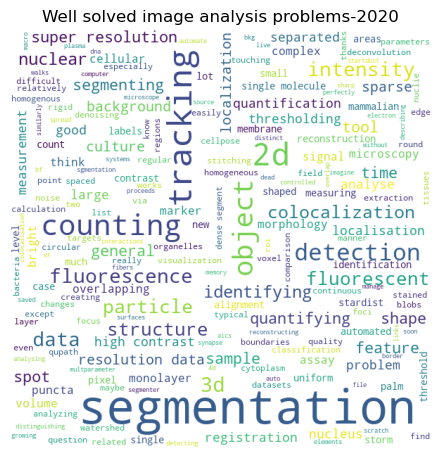

In [ ]:
wordcloud(well_solved_2021["Well solved image analysis problems-2020"], extra_stopwords=['finding nuclei','finding', 'nuclei', 'tissue','analysis', 'analysis of super-resolution data', 'cell', 'cells', 'etc', 'image', 'images', 'well', 
             'solved', 'imaging', 'better', 'simple', 'different', 'non', 'within', 'depend', 'none', 'things', 'easy', 'many', 'almost', 'common', 
             'though', 'n', 'depends', 'number', 'made', 'seem', 'show', 'particularly', 'co', 'size', 'types', 'every', 'possible', 'based', 'generally', 'semi', 'work', 'don', 't', 'basic'])

In [ ]:
# wordcloud for image analysis problems which need better solutions -2021
better_sol_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_problems_ie_finding_nuclei_tissue_analysis_analysis_of_super-resolution_data_etc_do_you_wish_had_easier_better_solutions.txt')
better_sol_2021 = better_sol_2021.rename(columns= {'0':'Image analysis problems that need better solutions-2020'})

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_56876\1298671548.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



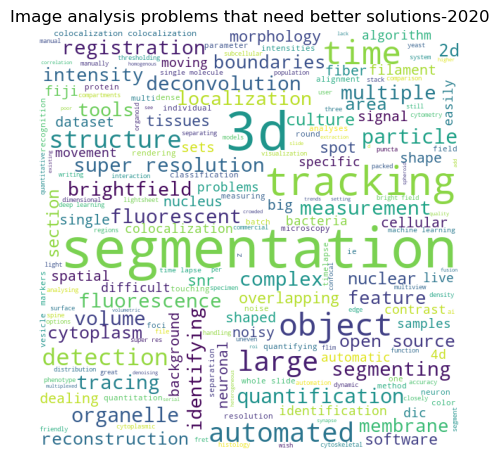

In [ ]:
wordcloud(better_sol_2021["Image analysis problems that need better solutions-2020"], extra_stopwords=['finding nuclei','finding', 'nuclei', 'tissue', 'analysis', 'analysis of super-resolution data', 'image', 'images', 'imaging', 'e', 'g', 
             'cell', 'em', 'non', 'etc', 'cells', 'better', 'find', 'easy', 'sample', 'well', 'don', 't', 'different', 'without','many', 'change', 'high', 'especially', 
             'low', 'good', 'tool', 'based', 'things', 'changes','within', 'problem', 'small', 'working', 'data', 
             'analyzing','set', 'often', 'easier', 'clearly', 'types', 'general', 'anything', 'co', 'work', 'highly', 'need', 'way', 're'])